# Determine PyMARE Estimators' outputs via NiMARE Estimators

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from nilearn import plotting
import numpy as np

import nimare as nim
import pymare

In /Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
dset = nim.dataset.Dataset('/Users/tsalo/Documents/tsalo/NiMARE/nimare/tests/data/test_pain_dataset.json',
                           mask='/Users/tsalo/Documents/tsalo/NiMARE/nimare/tests/data/test_pain_dataset/mask.nii.gz')
dset.update_path('/Users/tsalo/Documents/tsalo/NiMARE/nimare/tests/data/test_pain_dataset')

INFO:nimare.utils:Shared path detected: "/Users/tsalo/Documents/tsalo/NiMARE/nimare/tests/data/test_pain_dataset/"


In [3]:
meta = nim.meta.ibma.WeightedLeastSquares()
meta.fit(dset)

INFO:nimare.dataset:Retaining 20/21 studies
/Users/tsalo/Documents/tsalo/PyMARE/pymare/stats.py:23: RuntimeWarning: divide by zero encountered in true_divide
  w = 1. / (v + tau2)
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


In [4]:
img = meta.results.get_map('z', 'image')

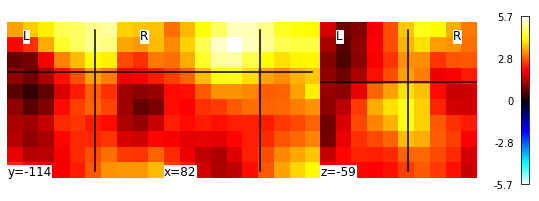

In [6]:
plotting.plot_stat_map(img, bg_img=None)

In [40]:
est = pymare.estimators.DerSimonianLaird()
X = np.random.random((meta.inputs_['varcope_maps'].shape[0], 1))
pymare_dset = pymare.Dataset(y=meta.inputs_['beta_maps'],
                             v=meta.inputs_['varcope_maps'],
                             X=X, add_intercept=True)
est.fit(pymare_dset)
est_summary = est.summary()

/Users/tsalo/Documents/tsalo/PyMARE/pymare/stats.py:23: RuntimeWarning: divide by zero encountered in true_divide
  w = 1. / (v + tau2)
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff
/Users/tsalo/Documents/tsalo/PyMARE/pymare/estimators/estimators.py:177: RuntimeWarning: divide by zero encountered in true_divide
  w = 1. / v


In [41]:
est_summary.get_fe_stats().keys()

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


dict_keys(['est', 'se', 'ci_l', 'ci_u', 'z', 'p'])

In [42]:
est_summary.get_re_stats().keys()

/Users/tsalo/Documents/tsalo/PyMARE/pymare/results.py:73: UserWarning: Method 'QP' is not parallelized; it may take a while to compute CIs for 1000 parallel tau^2 values.
  "compute CIs for {} parallel tau^2 values.".format(n_iters))
/Users/tsalo/Documents/tsalo/PyMARE/pymare/stats.py:23: RuntimeWarning: divide by zero encountered in true_divide
  w = 1. / (v + tau2)
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff
/Users/tsalo/Documents/tsalo/PyMARE/pymare/stats.py:116: RuntimeWarning: divide by zero encountered in true_divide
  w = 1. / (v + tau2)


ValueError: Value of tau^2 must be >= 0.

In [19]:
est_summary.get_re_stats()['tau^2']

array([       nan,        nan,        nan, 0.01176445, 0.01751588,
       0.03701436, 0.07412349, 0.10152872, 0.12700908, 0.12146239,
              nan,        nan,        nan, 0.01467446, 0.01542352,
       0.03893698, 0.07724827, 0.09700001, 0.12154251, 0.11925676,
              nan,        nan,        nan, 0.02030581, 0.01707959,
       0.04725981, 0.08906997, 0.10496266, 0.13436228, 0.12756236,
       0.29080991, 0.19535864, 0.12818198, 0.05367377, 0.03992374,
       0.08079151, 0.11878674, 0.13278127, 0.16593962, 0.15746769,
       0.51475526, 0.38819777, 0.25156304, 0.1033501 , 0.078007  ,
       0.13393999, 0.15887038, 0.17543376, 0.20584823, 0.19523948,
       0.65856161, 0.58944398, 0.40977612, 0.18511336, 0.11403296,
       0.13827949, 0.14785889, 0.17404001, 0.23098433, 0.22642451,
       0.85146922, 0.85461259, 0.61380358, 0.27900772, 0.14947277,
       0.11360679, 0.1351274 , 0.17473504, 0.23113807, 0.21773081,
       1.05255244, 0.97265419, 0.67393041, 0.31717708, 0.16808

In [21]:
res = est_summary.permutation_test()

/Users/tsalo/Documents/tsalo/PyMARE/pymare/stats.py:23: RuntimeWarning: divide by zero encountered in true_divide
  w = 1. / (v + tau2)
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff
/Users/tsalo/Documents/tsalo/PyMARE/pymare/estimators/estimators.py:177: RuntimeWarning: divide by zero encountered in true_divide
  w = 1. / v
/Users/tsalo/Documents/tsalo/PyMARE/pymare/results.py:211: RuntimeWarning: invalid value encountered in less
  fe_p[:, i] = (np.abs(fe_obs) < np.abs(params['fe_params'])).mean(1)
/Users/tsalo/Documents/tsalo/PyMARE/pymare/results.py:214: RuntimeWarning: invalid value encountered in less
  tau_p[i] = (abs_obs < np.abs(params['tau2'])).mean()


In [29]:
res.perm_p

{'fe_p': array([[0.001, 0.001, 0.001, 0.034, 0.062, 0.005, 0.001, 0.001, 0.001,
         0.001, 0.001, 0.001, 0.001, 0.262, 0.198, 0.011, 0.001, 0.001,
         0.001, 0.003, 0.001, 0.001, 0.001, 0.323, 0.292, 0.016, 0.001,
         0.001, 0.001, 0.001, 0.004, 0.032, 0.033, 0.065, 0.127, 0.006,
         0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.006, 0.011, 0.078,
         0.023, 0.004, 0.003, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
         0.021, 0.021, 0.007, 0.006, 0.001, 0.001, 0.001, 0.001, 0.001,
         0.001, 0.001, 0.001, 0.004, 0.006, 0.001, 0.001, 0.001, 0.001,
         0.001, 0.001, 0.001, 0.004, 0.007, 0.002, 0.004, 0.008, 0.001,
         0.001, 0.001, 0.001, 0.001, 0.003, 0.005, 0.009, 0.001, 0.005,
         0.001, 0.001, 0.001, 0.001, 0.001, 0.006, 0.009, 0.01 , 0.02 ,
         0.02 , 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
         0.001, 0.001, 0.001, 0.001, 0.001, 0.005, 0.001, 0.001, 0.001,
         0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.031

In [27]:
est_summary.tau2

array([       nan,        nan,        nan, 0.01176445, 0.01751588,
       0.03701436, 0.07412349, 0.10152872, 0.12700908, 0.12146239,
              nan,        nan,        nan, 0.01467446, 0.01542352,
       0.03893698, 0.07724827, 0.09700001, 0.12154251, 0.11925676,
              nan,        nan,        nan, 0.02030581, 0.01707959,
       0.04725981, 0.08906997, 0.10496266, 0.13436228, 0.12756236,
       0.29080991, 0.19535864, 0.12818198, 0.05367377, 0.03992374,
       0.08079151, 0.11878674, 0.13278127, 0.16593962, 0.15746769,
       0.51475526, 0.38819777, 0.25156304, 0.1033501 , 0.078007  ,
       0.13393999, 0.15887038, 0.17543376, 0.20584823, 0.19523948,
       0.65856161, 0.58944398, 0.40977612, 0.18511336, 0.11403296,
       0.13827949, 0.14785889, 0.17404001, 0.23098433, 0.22642451,
       0.85146922, 0.85461259, 0.61380358, 0.27900772, 0.14947277,
       0.11360679, 0.1351274 , 0.17473504, 0.23113807, 0.21773081,
       1.05255244, 0.97265419, 0.67393041, 0.31717708, 0.16808